Example: using Pandas to explore Kepler data
------------

The Kepler probe observed a patch of sky for four years looking for transit signals, evidence of planets slightly dimming these stars by passing between us and the star on their orbit.

The following example fetches the KOI (Kepler Object of Interest) table. Each row is a star that showed periodic dimming consistent with a planet in orbit around the star. However, we expect that there are a lot of false positives, so not every row corresponds to a real planet.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
koi = pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')

In [3]:
koi.describe()

,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_kepmag_err
count,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8469.000000,8469.000000,8826.000000,8469.000000,...,8365.000000,8348.000000,8469.000000,8365.000000,8365.000000,8469.000000,8365.000000,8365.000000,8825.000000,0
mean,7674321.918196,0.128031,0.232608,0.159642,0.116021,70.246533,0.001681,-0.001681,163.412837,0.008642,...,161.647340,-175.009943,4.357337,0.103436,-0.223424,1.478861,0.529950,-0.306424,14.270719,NaN
std,2656081.611461,0.334143,0.422518,0.366294,0.320268,1388.387352,0.007288,0.007288,63.485722,0.020739,...,42.840349,58.198798,0.385982,0.113674,0.137666,4.044114,1.011488,1.098012,1.384703,NaN
min,757450.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000006,...,0.000000,-1473.000000,0.146000,0.000000,-1.207000,0.109000,0.000000,-34.637000,6.966000,NaN
25%,5531758.750000,0.000000,0.000000,0.000000,0.000000,2.834688,0.000004,-0.000208,132.837453,0.000981,...,152.000000,-202.000000,4.302000,0.037000,-0.296000,0.817000,0.268000,-0.181000,13.450000,NaN
50%,7888376.500000,0.000000,0.000000,0.000000,0.000000,9.477663,0.000029,-0.000029,137.127774,0.003460,...,163.000000,-167.000000,4.459000,0.061000,-0.252000,0.969000,0.377000,-0.093000,14.534000,NaN
75%,9850729.000000,0.000000,0.000000,0.000000,0.000000,35.483740,0.000208,-0.000004,170.044769,0.008980,...,177.000000,-142.000000,4.552000,0.118000,-0.109000,1.195000,0.603000,-0.066000,15.322000,NaN
max,12935144.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522007,0.579000,...,1067.000000,0.000000,5.364000,1.184000,0.000000,149.058000,33.474000,0.000000,20.003000,NaN


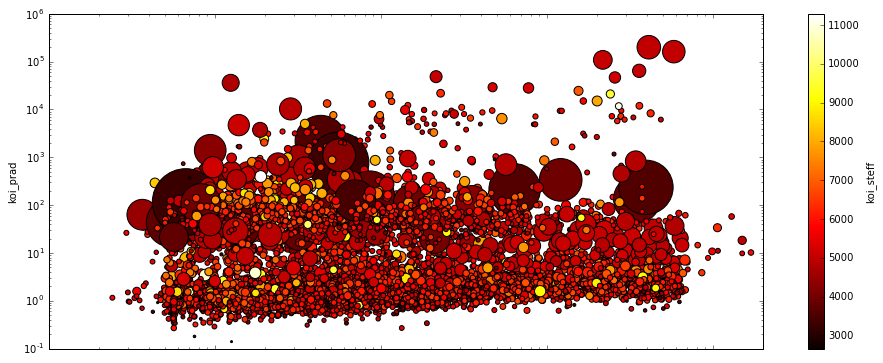

In [4]:
ax = koi.plot(x='koi_period', y='koi_prad', c='koi_steff', s=koi['koi_srad']*30, colormap=plt.cm.hot, kind='scatter', 
              figsize=(16,6), xlim=(0.1,2000), loglog=True)

In [5]:
koi['koi_steff'].describe()

count     8469.00000
mean      5745.46558
std        799.93481
min       2661.00000
25%       5335.00000
50%       5806.00000
75%       6164.00000
max      11287.00000
Name: koi_steff, dtype: float64

In [6]:
koi['koi_srad'].describe()

count    8469.000000
mean        1.478861
std         4.044114
min         0.109000
25%         0.817000
50%         0.969000
75%         1.195000
max       149.058000
Name: koi_srad, dtype: float64

In [7]:
koi.index = koi['kepid']

In [8]:
koi.iloc[42]

kepid                       11304958
kepoi_name                 K00764.01
kepler_name                      NaN
koi_disposition            CANDIDATE
koi_pdisposition           CANDIDATE
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   41.4396
koi_period_err1            8.183e-05
koi_period_err2           -8.183e-05
koi_time0bk                  208.931
koi_time0bk_err1             0.00161
koi_time0bk_err2            -0.00161
koi_impact                    0.3872
koi_impact_err1                0.087
koi_impact_err2              -0.3149
koi_duration                 10.6468
koi_duration_err1             0.0961
koi_duration_err2            -0.0961
koi_depth                     3010.1
koi_depth_err1                  26.3
koi_depth_err2                 -26.3
koi_prad                        5.73
koi_prad_err1                   2.06
koi_prad_err2                  -0.86
k

In [9]:
output = koi.ix[koi.kepler_name.isnull() == False]

In [10]:
output.to_excel('planets.xls')